In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")


## Importações e avaliação inicial do dataset

In [2]:
from google.colab import files

uploaded = files.upload()

Saving customer_segmentation.csv to customer_segmentation.csv


In [3]:
df = pd.read_csv("customer_segmentation.csv")

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.shape

(2240, 29)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Missing Data

**Check for missing data**

In [7]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


**As 24 linhas vazias foram excluídas**

In [8]:
df[df['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [9]:

df = df.dropna()

**Valindo se ainda há missing values**

In [10]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


**No missing values**

## Avaliação geral das variáveis

**Data de inscrição dos clientes**

In [11]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%d-%m-%Y")
dates = []

for i in df['Dt_Customer']:
  i = i.date()
  dates.append(i)

#Dates of the newest and oldest recorded customer
print("Data de inscrição mais recente do cliente é",max(dates))
print("Data mais antiga do cliente mais recente é",min(dates))

Data de inscrição mais recente do cliente é 2014-06-29
Data mais antiga do cliente mais recente é 2012-07-30


**Exploração das variaveis categoricas**

In [12]:
print("Estado Civil \n", df["Marital_Status"].value_counts(), "\n")
print("Nível de educação \n", df["Education"].value_counts())

Estado Civil 
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Nível de educação 
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


**Calculando a idade de acordo com a data de nascimento**

In [13]:
df['Age_on_2025'] = 2025 - df['Year_Birth']

In [14]:
df['Age_on_2025'].describe()

,Age_on_2025
count,2216.000000
mean,56.179603
std,11.985554
min,29.000000
25%,48.000000
50%,55.000000
75%,66.000000
max,132.000000


In [15]:
## Dropando idade acima de 90 anos
df[df['Age_on_2025'] > 90 ]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age_on_2025
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,0,0,0,0,0,1,3,11,0,125
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,0,0,0,0,0,0,3,11,0,132
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,0,0,1,0,0,0,3,11,0,126


In [16]:
df = df.drop(df[df['Age_on_2025'] > 90 ].index)

In [17]:
df[df['Age_on_2025'] > 90 ]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age_on_2025


In [18]:
# Criando uma coluna de gasto
df['Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [19]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age_on_2025,Spent
count,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213,2213.000000,2213.000000,2213.000000,2213.000000,...,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.0,2213.0,2213.000000,2213.000000,2213.000000
mean,5586.899232,1968.917307,52236.581563,0.441934,0.505648,2013-07-10 06:26:30.962494464,49.007682,305.153638,26.323995,166.962494,...,0.074108,0.072752,0.064166,0.013556,0.009038,3.0,11.0,0.150474,56.082693,607.021690
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,29.000000,5.000000
25%,2815.000000,1959.000000,35246.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,2.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,48.000000,69.000000
50%,5455.000000,1970.000000,51373.000000,0.000000,0.000000,2013-07-08 00:00:00,49.000000,175.000000,8.000000,68.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,55.000000,397.000000
75%,8420.000000,1977.000000,68487.000000,1.000000,1.000000,2013-12-31 00:00:00,74.000000,505.000000,33.000000,232.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,66.000000,1048.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,85.000000,2525.000000
std,3247.819194,11.700216,25178.603047,0.536965,0.544236,NaN,28.941864,337.305490,39.735932,224.226178,...,0.262005,0.259788,0.245104,0.115666,0.094657,0.0,0.0,0.357617,11.700216,602.488663


### Distribuição das variaveis

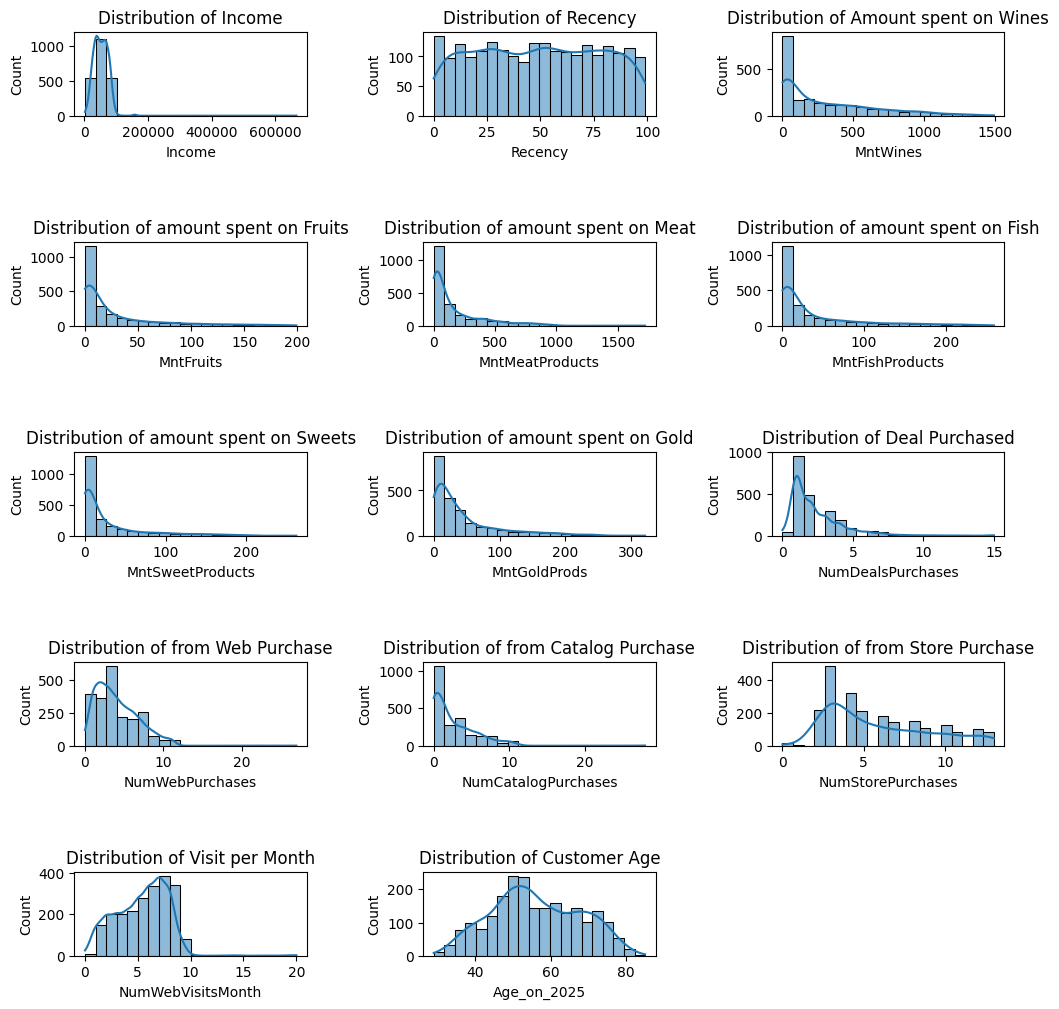

In [20]:
plt.figure(figsize = (12, 12))
plt.subplots_adjust(hspace = 1.5, wspace=0.5)

plt.subplot(5, 3, 1)
sns.histplot(df, x = 'Income', kde = True, bins = 20)
plt.title("Distribution of Income")

plt.subplot(5, 3, 2)
sns.histplot(df, x = 'Recency', kde = True, bins = 20)
plt.title("Distribution of Recency")

plt.subplot(5, 3, 3)
sns.histplot(df, x = "MntWines", kde = True, bins = 20)
plt.title("Distribution of Amount spent on Wines")

plt.subplot(5, 3, 4)
sns.histplot(df, x = 'MntFruits', kde = True, bins = 20)
plt.title("Distribution of amount spent on Fruits")

plt.subplot(5, 3, 5)
sns.histplot(df, x = 'MntMeatProducts', kde = True, bins = 20)
plt.title("Distribution of amount spent on Meat")

plt.subplot(5, 3, 6)
sns.histplot(df, x = 'MntFishProducts', kde = True, bins = 20)
plt.title("Distribution of amount spent on Fish")

plt.subplot(5, 3, 7)
sns.histplot(df, x = 'MntSweetProducts', kde = True, bins = 20)
plt.title("Distribution of amount spent on Sweets")

plt.subplot(5, 3, 8)
sns.histplot(df, x = 'MntGoldProds', kde = True, bins = 20)
plt.title("Distribution of amount spent on Gold")

plt.subplot(5, 3, 9)
sns.histplot(df, x = 'NumDealsPurchases', kde = True, bins = 20)
plt.title("Distribution of Deal Purchased")

plt.subplot(5, 3, 10)
sns.histplot(df, x = 'NumWebPurchases', kde = True, bins = 20)
plt.title("Distribution of from Web Purchase")

plt.subplot(5, 3, 11)
sns.histplot(df, x = 'NumCatalogPurchases', kde = True, bins = 20)
plt.title("Distribution of from Catalog Purchase")

plt.subplot(5, 3, 12)
sns.histplot(df, x = 'NumStorePurchases', kde = True, bins = 20)
plt.title("Distribution of from Store Purchase")

plt.subplot(5, 3, 13)
sns.histplot(df, x = 'NumWebVisitsMonth', kde = True, bins = 20)
plt.title("Distribution of Visit per Month")

plt.subplot(5, 3, 14)
sns.histplot(df, x = 'Age_on_2025', kde = True, bins = 20)
plt.title("Distribution of Customer Age")

plt.show()

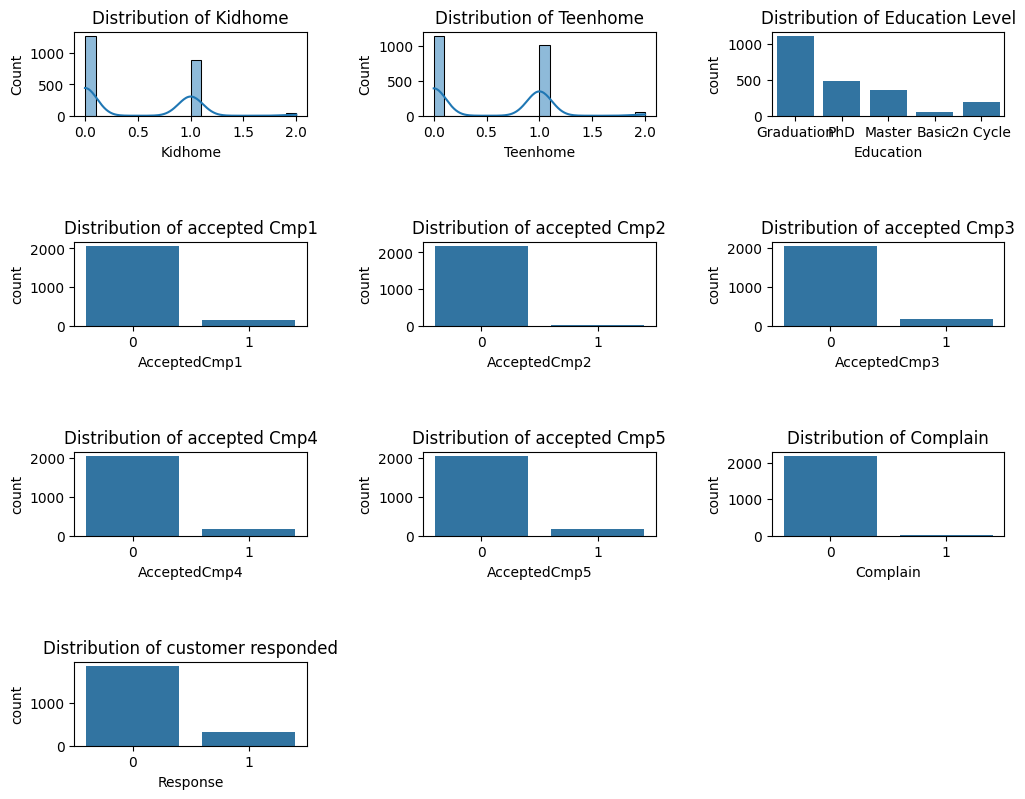

In [21]:
plt.figure(figsize = (12, 12))
plt.subplots_adjust(hspace = 1.5, wspace=0.5)

plt.subplot(5, 3, 1)
sns.histplot(df, x = 'Kidhome', kde = True, bins = 20)
plt.title("Distribution of Kidhome")

plt.subplot(5, 3, 2)
sns.histplot(df, x = 'Teenhome', kde = True, bins = 20)
plt.title("Distribution of Teenhome")


plt.subplot(5, 3, 3)
sns.countplot(df, x = 'Education')
plt.title("Distribution of Education Level")

plt.subplot(5, 3, 4)
sns.countplot(df, x = 'AcceptedCmp1')
plt.title("Distribution of accepted Cmp1")

plt.subplot(5, 3, 5)
sns.countplot(df, x = 'AcceptedCmp2')
plt.title("Distribution of accepted Cmp2")

plt.subplot(5, 3, 6)
sns.countplot(df, x = 'AcceptedCmp3')
plt.title("Distribution of accepted Cmp3")

plt.subplot(5, 3, 7)
sns.countplot(df, x = 'AcceptedCmp4')
plt.title("Distribution of accepted Cmp4")

plt.subplot(5, 3, 8)
sns.countplot(df, x = 'AcceptedCmp5')
plt.title("Distribution of accepted Cmp5")

plt.subplot(5, 3, 9)
sns.countplot(df, x = 'Complain')
plt.title('Distribution of Complain')

plt.subplot(5, 3, 10)
sns.countplot(df, x = 'Response')
plt.title('Distribution of customer responded')


plt.show()

In [22]:
#A maioria das colunas de Campanha estão vazias, então vamos juntar todas em uma só

df['AcceptedCmp'] = df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['AcceptedCmp1'] + df['AcceptedCmp2']

In [23]:
df = df.drop(columns = [ 'AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2'], axis = 1)

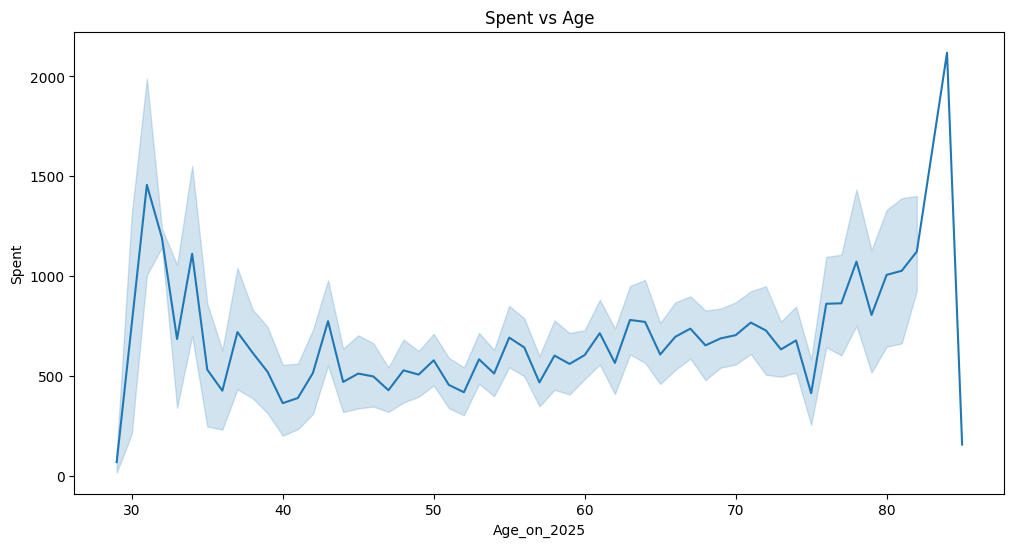


 Correlação entre valor gasto total e idade: 0.11614952268084275


In [24]:
plt.figure(figsize = (12, 6))
sns.lineplot(df, x = 'Age_on_2025', y = 'Spent')
plt.title("Spent vs Age")
plt.show()
print(f"\n Correlação entre valor gasto total e idade: {df['Age_on_2025'].corr(df['Spent'])}")

**From Spent vs Age plot, we can see that as Age increase, Spent also increases. Correlation score is 0.114.**

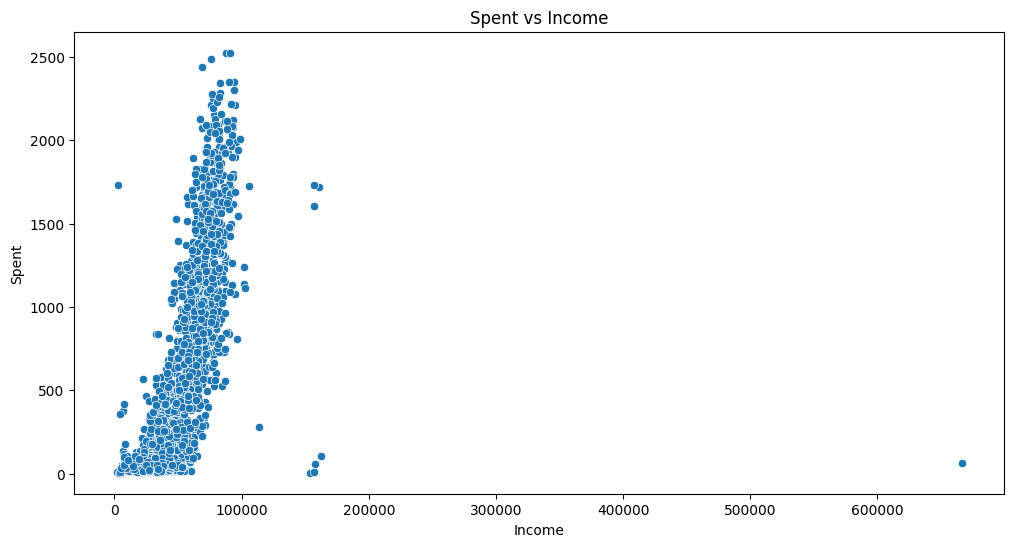


Correlation between Age_on_2014 and Spent: 0.66751615890341


In [25]:
plt.figure(figsize = (12, 6))
sns.scatterplot(df, x = 'Income', y = 'Spent')
plt.title("Spent vs Income")
plt.grid(False)
plt.show()
print(f"\nCorrelation between Age_on_2014 and Spent: {df['Income'].corr(df['Spent'])}")

### Outliers

Aparetemente temos outliers no Income, então vamos retira-lo

In [26]:
quan_75 = df["Income"].quantile(0.75)
quan_25 = df["Income"].quantile(0.25)

IQR = quan_75 - quan_25

upper = quan_75 + (1.5 * IQR)

In [27]:
quan_75

np.float64(68487.0)

In [28]:
df[df["Income"] > upper]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Age_on_2025,Spent,AcceptedCmp
164,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,...,22,0,0,0,3,11,0,52,1608,0
617,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,...,0,1,1,0,3,11,0,49,107,0
655,5555,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,...,0,0,0,0,3,11,0,50,6,0
687,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,...,28,1,0,0,3,11,0,43,1717,0
1300,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,...,0,1,1,0,3,11,0,54,59,0
1653,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,...,28,0,1,0,3,11,0,48,1730,0
2132,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,...,0,0,0,0,3,11,0,76,8,0
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,1,3,6,0,3,11,0,48,62,0


In [29]:
df = df.drop(df[df['Income'] > upper ].index)

Depois de retirar os outilers

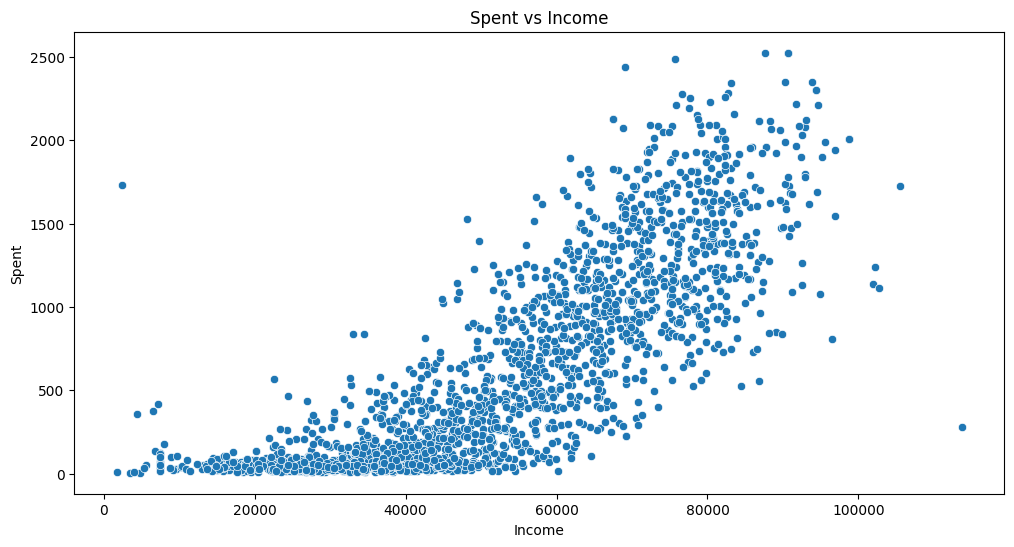


Correlation between Age_on_2014 and Spent: 0.8237696997821241


In [30]:
plt.figure(figsize = (12, 6))
sns.scatterplot(df, x = 'Income', y = 'Spent')
plt.title("Spent vs Income")
plt.grid(False)
plt.show()
print(f"\nCorrelation between Age_on_2014 and Spent: {df['Income'].corr(df['Spent'])}")

## Convertendo as variáveis categoricas em numéricas

---



In [31]:
a = (df.dtypes == 'object')
object_cols = list(a[a].index)
print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Marital_Status']


In [32]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
for i in object_cols:
  df[i] = df[[i]].apply(LE.fit_transform)

In [33]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Age_on_2025,Spent,AcceptedCmp
0,5524,1957,2,4,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,3,11,1,68,1617,0
1,2174,1954,2,4,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,3,11,0,71,27,0
2,4141,1965,2,5,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,3,11,0,60,776,0
3,6182,1984,2,5,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,3,11,0,41,53,0
4,5324,1981,4,3,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,3,11,0,44,422,0


**Check correlation amongst the features.**

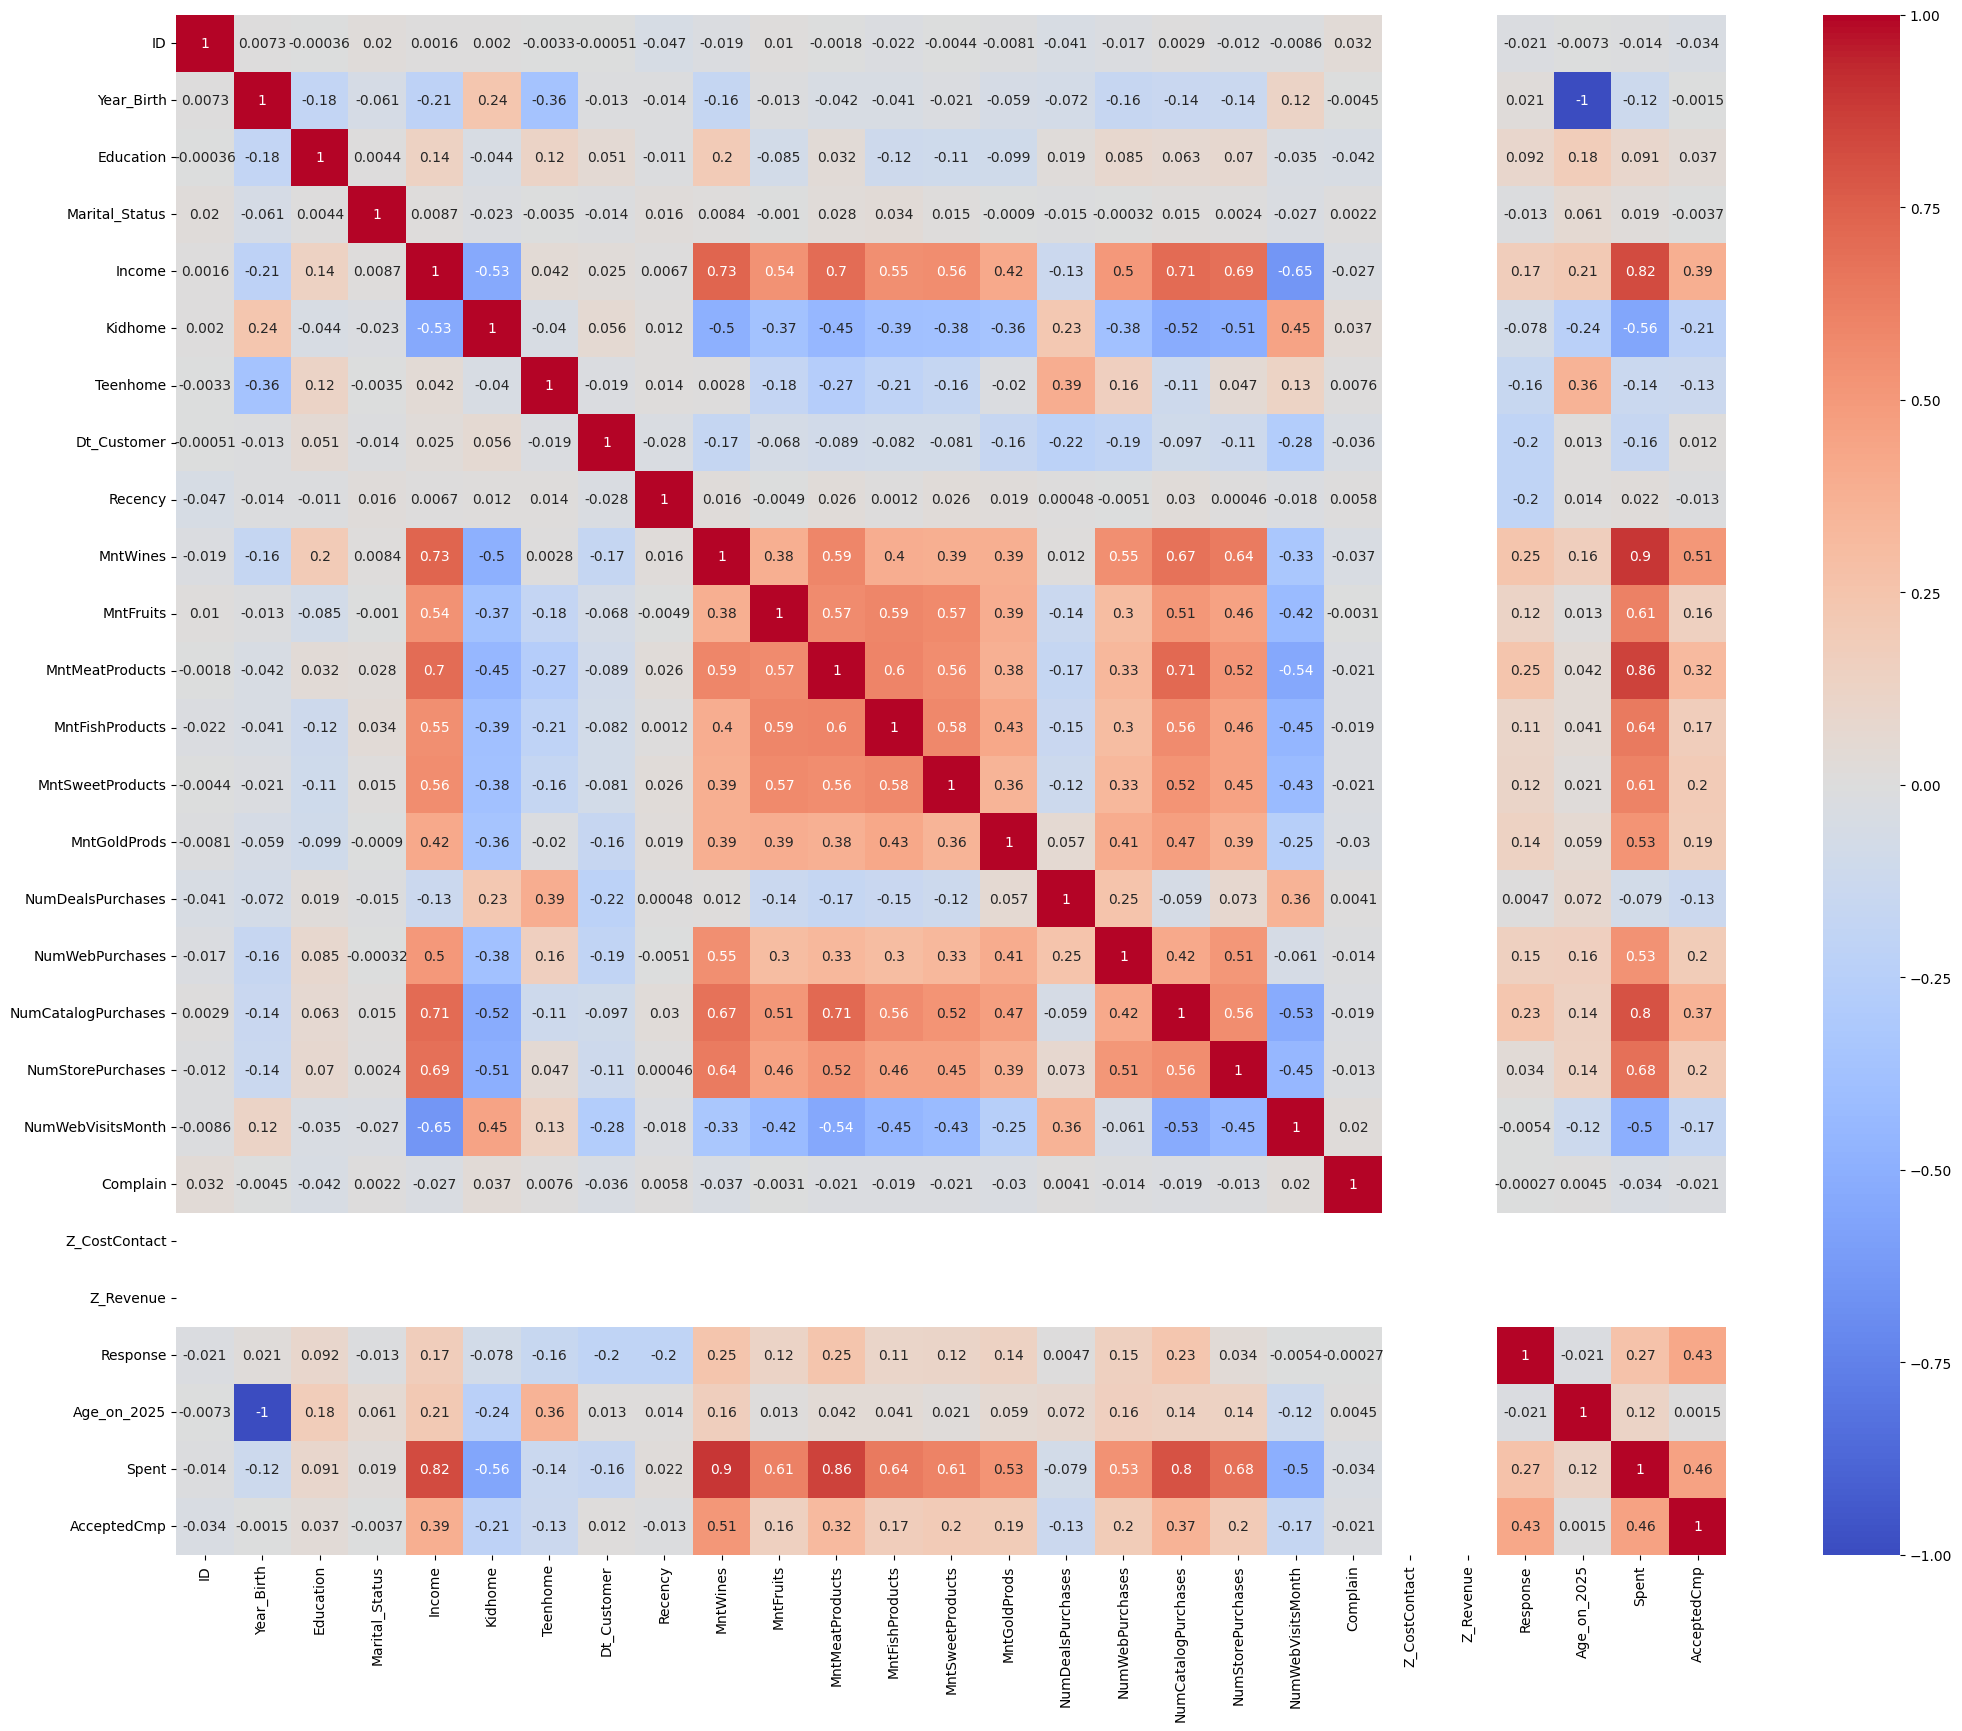

In [34]:
corrmax = df.corr()
plt.figure(figsize = (25, 20))
sns.heatmap(corrmax, annot = True, cmap = 'coolwarm', center = 0)
plt.show()

In [35]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age_on_2025',
       'Spent', 'AcceptedCmp'],
      dtype='object')

## Deletando algumas features que não possuem correlação

In [36]:
df = df.drop(columns = [ 'Complain','Recency', 'Dt_Customer', 'ID','Z_CostContact','Z_Revenue','Year_Birth'], axis = 1)

## Standard Scaler e PCA

In [37]:
df1 = df.copy()

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df1)
scaled_df1 = pd.DataFrame(scaler.transform(df1), columns = df1.columns)

In [39]:
scaled_df1

,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Age_on_2025,Spent,AcceptedCmp
0,-0.350162,0.254792,0.314651,-0.823405,-0.930767,0.974566,1.548614,1.748400,2.449154,1.480301,0.849556,0.361479,1.424772,2.628526,-0.562650,0.689203,2.370996,1.017189,1.679323,-0.439991
1,-0.350162,0.254792,-0.254877,1.038757,0.906602,-0.874776,-0.638664,-0.731678,-0.652345,-0.635399,-0.735767,-0.168834,-1.132957,-0.588043,-1.179732,-0.139645,-0.421764,1.273530,-0.963897,-0.439991
2,-0.350162,1.183413,0.965354,-0.823405,-0.930767,0.355155,0.568110,-0.175957,1.336263,-0.149031,-0.039771,-0.699147,1.424772,-0.230646,1.288596,-0.554069,-0.421764,0.333612,0.281242,-0.439991
3,-0.350162,1.183413,-1.206087,1.038757,-0.930767,-0.874776,-0.563241,-0.667380,-0.506392,-0.586763,-0.755100,-0.168834,-0.767567,-0.945440,-0.562650,0.274779,-0.421764,-1.289883,-0.920675,-0.439991
4,1.432997,-0.673830,0.322136,1.038757,-0.930767,-0.394659,0.417263,-0.217292,0.150396,-0.003121,-0.561768,1.422105,0.328602,0.126750,0.054432,-0.139645,-0.421764,-1.033542,-0.307248,-0.439991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,-0.350162,-0.673830,0.463624,-0.823405,0.906602,1.193879,0.417263,0.076644,0.077420,2.209853,3.923536,-0.168834,1.790162,0.126750,-0.562650,-0.139645,-0.421764,0.162718,1.220500,-0.439991
2201,1.432997,1.183413,0.598401,2.900920,0.906602,0.295881,-0.663806,-0.621452,-0.688833,-0.659718,-0.697100,2.482731,1.424772,-0.230646,-0.254109,0.689203,-0.421764,1.957107,-0.270675,1.029979
2202,-0.350162,-1.602451,0.258780,-0.823405,-0.930767,1.783653,0.542969,0.237389,-0.105022,-0.367897,-0.387769,-0.699147,-0.767567,0.126750,2.214218,0.274779,-0.421764,-1.033542,1.054260,1.029979
2203,0.541417,1.183413,0.851004,-0.823405,0.906602,0.361082,0.090428,0.223611,0.770696,0.069834,0.327560,-0.168834,0.693992,0.841543,1.288596,-0.968493,-0.421764,1.102636,0.392623,-0.439991


In [ ]:
scaled_df1.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Response', 'Age_on_2024', 'Spent', 'AcceptedCmp'],
      dtype='object')

In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(scaled_df1)

## Grid Search Kmeans

In [41]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, silhouette_score

def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)


param_grid_kmeans = {
    'n_clusters': [2, 3, 4, 5],
    'init': ['k-means++', 'random'],
    'n_init': [10, 20],
    'max_iter': [300, 600]
}


kmeans = KMeans()

grid_search_kmeans = GridSearchCV(estimator=kmeans, param_grid=param_grid_kmeans,
                                  scoring=make_scorer(silhouette_scorer),
                                  cv=5)


grid_search_kmeans.fit(data_pca)


print(f"Melhores Hiperparâmetros (KMeans): {grid_search_kmeans.best_params_}")



Melhores Hiperparâmetros (KMeans): {'init': 'k-means++', 'max_iter': 300, 'n_clusters': 2, 'n_init': 10}


In [42]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=3790889a886248ed5492b93f949c3240e7549a13caf81e495568eb0c28f19960
  Stored in directory: /root/.cache/pip/wheels/0f/8c/a4/5b7aa56fa6ef11d536d45da775bcc5a2a1c163ff0f8f11990b
Successfully built minisom


## Grid Search com o SOM

In [43]:
scaled_df1.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Response', 'Age_on_2025', 'Spent', 'AcceptedCmp'],
      dtype='object')

In [44]:
data_scaled = data_pca

In [45]:
data_scaled

array([[ 4.28761178, -0.32737291],
       [-2.55919721,  0.27930507],
       [ 1.78222133, -0.24497812],
       ...,
       [ 1.71743855, -0.77212848],
       [ 2.00061031,  1.25126899],
       [-1.76393151,  1.44167516]])

## Melhor resultado

In [ ]:
best_params = None
best_score = -1

for size in [5, 10, 15, 20]:
    for sigma in [1.0, 2.0, 3.0, 4.0]:
        for lr in [0.1, 0.3, 0.4, 0.5]:
            som = MiniSom(size, size, data_scaled.shape[1],
                          sigma=sigma, learning_rate=lr, random_seed=42)
            som.random_weights_init(data_scaled)
            som.train_random(data_scaled, 5000)

            winners = np.array([som.winner(x) for x in data_scaled])
            labels = winners[:,0] * size + winners[:,1]

            score = silhouette_score(data_scaled, labels)

            if score > best_score:
                best_score = score
                best_params = (size, sigma, lr)

print("Melhores parâmetros:", best_params)
print("Melhor silhouette:", best_score)


Melhores parâmetros: (5, 1.0, 0.3)
Melhor silhouette: 0.31168159410622415


## K Folds

In [ ]:
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from minisom import MiniSom


kf = KFold(n_splits=5, shuffle=True, random_state=42)


kmeans_silhouette_scores = []
som_silhouette_scores = []


for train_index, test_index in kf.split(data_scaled):
    train_data, test_data = data_scaled[train_index], data_scaled[test_index]


    kmeans = KMeans(n_clusters=2,max_iter=300, n_init=10, random_state=42)
    kmeans.fit(train_data)
    kmeans_labels = kmeans.predict(test_data)
    kmeans_silhouette = silhouette_score(test_data, kmeans_labels)
    kmeans_silhouette_scores.append(kmeans_silhouette)


    som = MiniSom(x=5, y=5, input_len=train_data.shape[1], sigma=1, learning_rate=0.1)
    som.random_weights_init(train_data)
    som.train_batch(data_scaled, 1500, verbose=True)


    bmu_indices = np.array([som.winner(x) for x in test_data])
    som_labels = np.ravel_multi_index(bmu_indices.T, (5, 5))
    som_silhouette = silhouette_score(test_data, som_labels)
    som_silhouette_scores.append(som_silhouette)

# Resultados
print(f'Média do Silhouette Score - KMeans: {np.mean(kmeans_silhouette_scores)}')
print(f'Média do Silhouette Score - SOM: {np.mean(som_silhouette_scores)}')


 [ 1500 / 1500 ] 100% - 0:00:00 left 
 quantization error: 0.5238400116652546
 [ 1500 / 1500 ] 100% - 0:00:00 left 
 quantization error: 0.5383280378909668
 [ 1500 / 1500 ] 100% - 0:00:00 left 
 quantization error: 0.5197733460568855
 [ 1500 / 1500 ] 100% - 0:00:00 left 
 quantization error: 0.5235039273109489
 [ 1500 / 1500 ] 100% - 0:00:00 left 
 quantization error: 0.5287229964147376
Média do Silhouette Score - KMeans: 0.5458208282905962
Média do Silhouette Score - SOM: 0.275757528331767


## Treinando o Kmeans com os melhores parametros

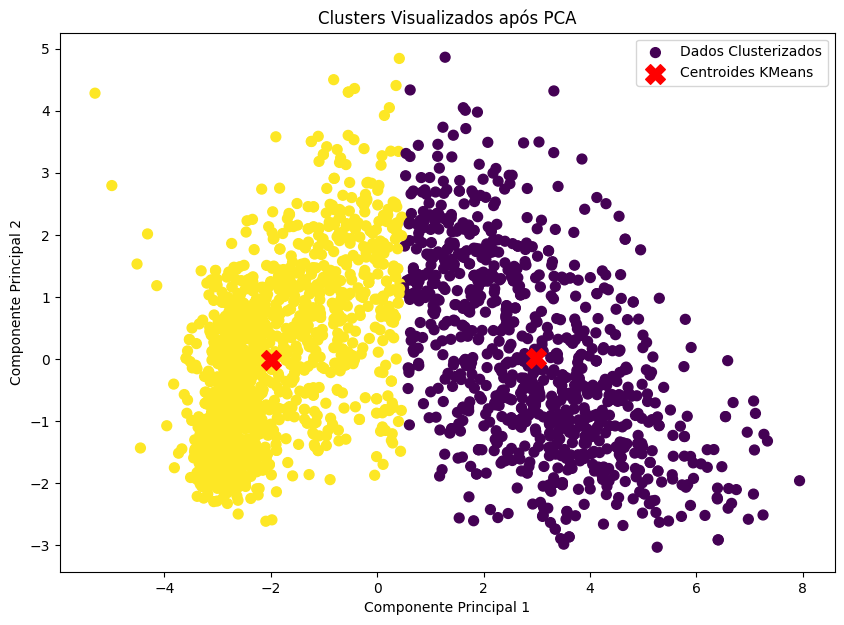

In [ ]:

kmeans = KMeans(init='k-means++', max_iter=300, n_clusters=2, n_init=10, random_state=42)
kmeans.fit(data_pca)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_


plt.figure(figsize=(10, 7))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, s=50, cmap='viridis', label='Dados Clusterizados')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red', label='Centroides KMeans')
plt.title('Clusters Visualizados após PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()


### Salvndo o dataframe

In [ ]:
kmeans = KMeans(n_clusters= 2, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_df1)
df1['Cluster'] = cluster_labels
df1.to_excel('Clustered_data.xlsx', index = False)

## Treinando SOM com os melhores parametros

In [ ]:
!pip install simpsom

In [ ]:
import simpsom

In [47]:
#Melhores Hiperparâmetros: Melhores parâmetros: (5, 1.0, 0.3)
random_seed = 42
som_size = 5
lr = 0.3
sigma = 1.0
max_epochs = 1500

In [49]:
data = data_pca
n_rows, n_columns = som_size, som_size

som_shape = (5, 5)
som = minisom.MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=sigma, learning_rate=lr,
              neighborhood_function='gaussian', random_seed=10)

som.train_batch(data_pca, 1500, verbose=True)

 [ 1500 / 1500 ] 100% - 0:00:00 left 
 quantization error: 0.5125217373034702


In [ ]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in data_scaled]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

In [ ]:
winner_coordinates

array([[2, 2, 2, ..., 4, 1, 1],
       [0, 4, 2, ..., 1, 1, 3]])

In [ ]:
cluster_index

array([10, 14, 12, ..., 21,  6,  8])

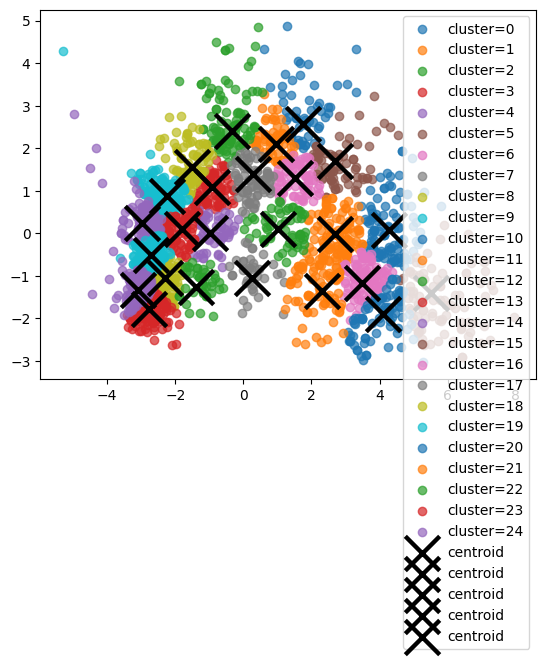

In [ ]:
# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    pyplot.scatter(data_pca[cluster_index == c, 0], data_pca[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in som.get_weights():
    pyplot.scatter(centroid[:, 0], centroid[:, 1], marker='x',
                s=5, linewidths=35, color='k', label='centroid')
pyplot.legend();

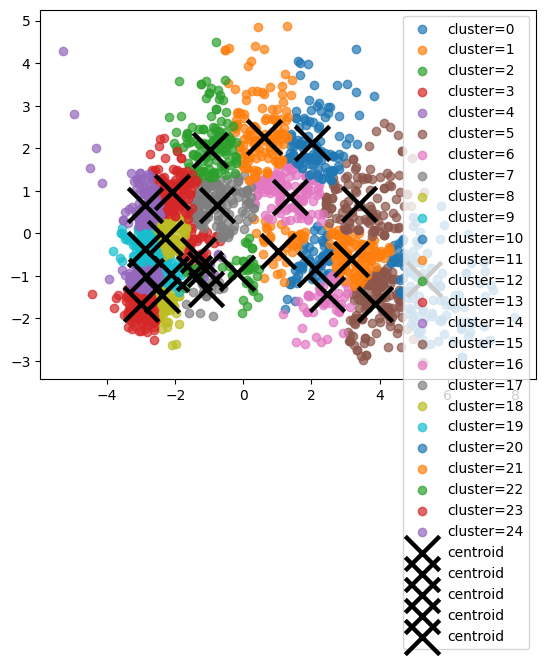

In [ ]:
# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    pyplot.scatter(data_pca[cluster_index == c, 0], data_pca[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in som.get_weights():
    pyplot.scatter(centroid[:, 0], centroid[:, 1], marker='x',
                s=5, linewidths=35, color='k', label='centroid')
pyplot.legend();